### General Imports

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import os
import glob
import json
import matplotlib.pyplot as plt


### Collecting interpolated files

In [5]:
allFiles = glob.glob("./interpolatedData/*.csv")
print(allFiles)

['./interpolatedData\\S-01.csv', './interpolatedData\\S-02.csv', './interpolatedData\\S-03.csv', './interpolatedData\\S-04.csv', './interpolatedData\\S-05.csv', './interpolatedData\\S-06.csv', './interpolatedData\\S-07.csv', './interpolatedData\\S-08.csv', './interpolatedData\\S-09.csv', './interpolatedData\\S-11.csv', './interpolatedData\\S-12.csv', './interpolatedData\\S-13.csv', './interpolatedData\\S-14.csv', './interpolatedData\\S-15.csv', './interpolatedData\\S-BU1.csv', './interpolatedData\\S-BU2.csv']


### A little bit more data cleaning

In [12]:
df = {}
for x in allFiles:
    name = x.split('\\')[1].split('.')[0]
    df[name] = pd.read_csv(x,parse_dates=[0])

In [42]:
dfMerged = []
for idx,i in enumerate(df['S-01'].values[:1138]):
    temp = []
    temp.append(i[0])
    for x in df:
        temp.append(df[x].values[idx][1])
    temp.append(np.average(temp[1:]))
    temp.append(np.var(temp[1:]))
    dfMerged.append(temp)

In [43]:
mergedData = pd.DataFrame(dfMerged,columns = ['Date_Time','S-01', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08', 'S-09', 'S-11', 'S-12', 'S-13', 'S-14', 'S-15', 'S-BU1', 'S-BU2','Average','Variance'])

### Exporting the data

### Plotting average and variance

Text(0.5, 1.0, 'Variance in Particles')

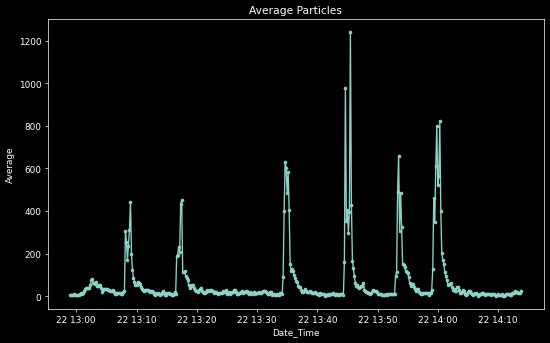

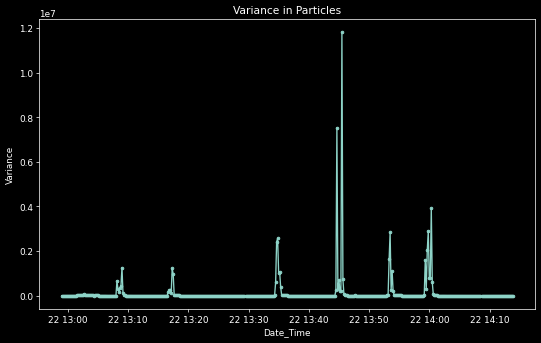

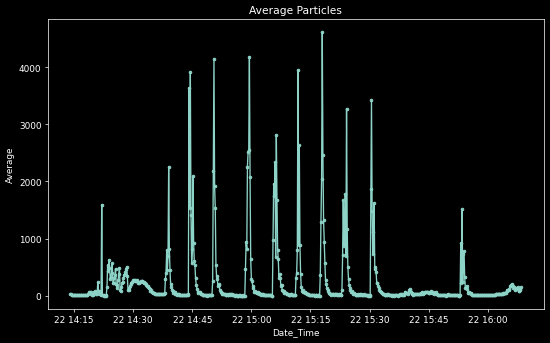

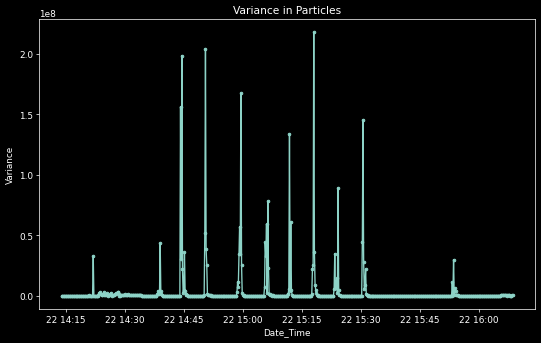

In [49]:
split = 450

fig = plt.figure(0, figsize=(10,6), dpi=64)
ax = fig.gca()
ax.plot(mergedData['Date_Time'][:split],mergedData['Average'][:split],'.-')
ax.set_xlabel(df[x].columns[0])
ax.set_ylabel('Average')
plt.title('Average Particles')

fig = plt.figure(2, figsize=(10,6), dpi=64)
ax = fig.gca()
ax.plot(mergedData['Date_Time'][:split],mergedData['Variance'][:split],'.-')
ax.set_xlabel(df[x].columns[0])
ax.set_ylabel('Variance')
plt.title('Variance in Particles')

fig = plt.figure(1, figsize=(10,6), dpi=64)
ax = fig.gca()
ax.plot(mergedData['Date_Time'][split:],mergedData['Average'][split:],'.-')
ax.set_xlabel(df[x].columns[0])
ax.set_ylabel('Average')
plt.title('Average Particles')

fig = plt.figure(4, figsize=(10,6), dpi=64)
ax = fig.gca()
ax.plot(mergedData['Date_Time'][split:],mergedData['Variance'][split:],'.-')
ax.set_xlabel(df[x].columns[0])
ax.set_ylabel('Variance')
plt.title('Variance in Particles')

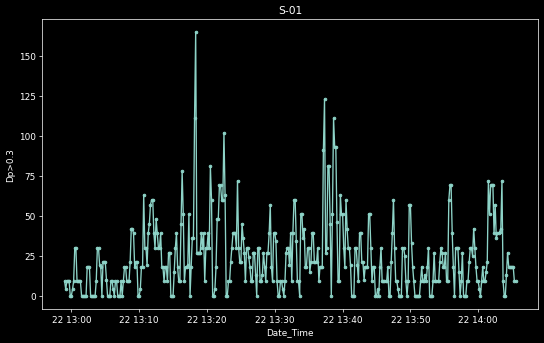

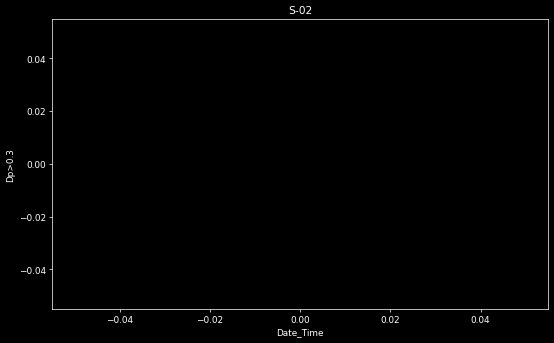

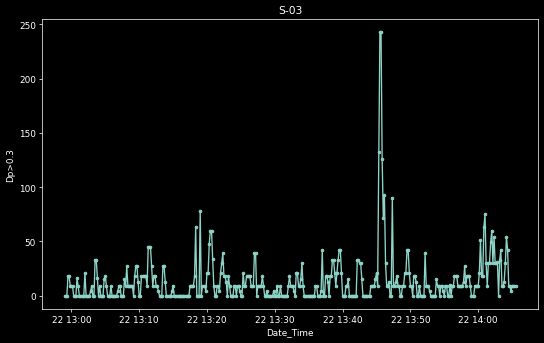

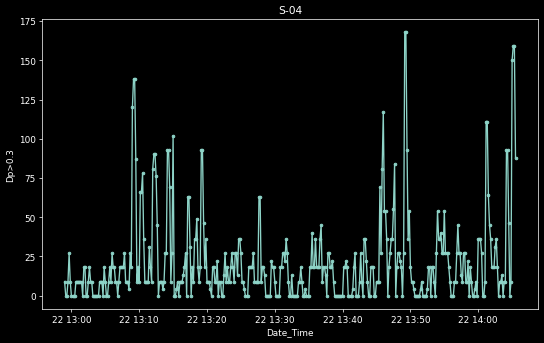

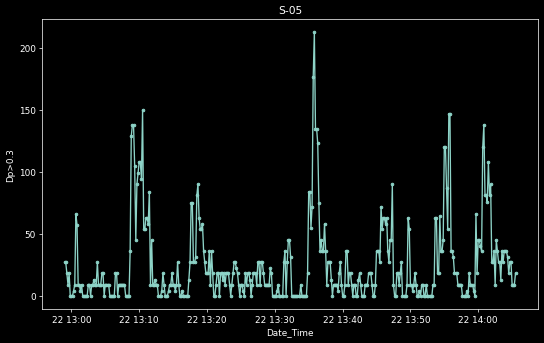

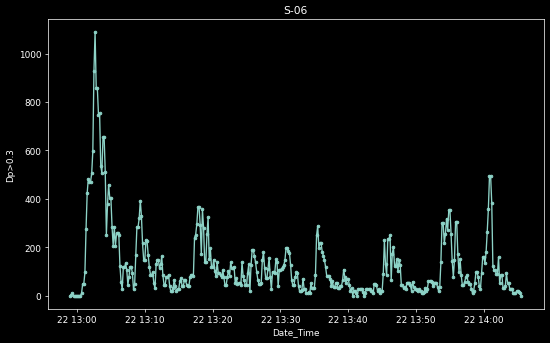

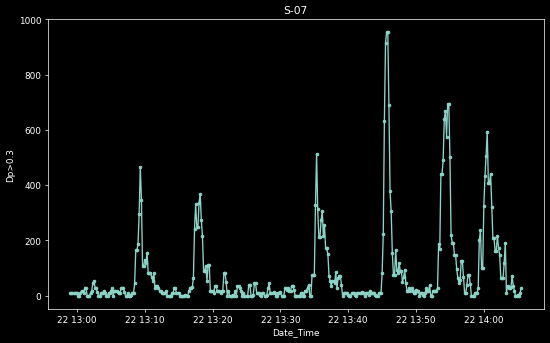

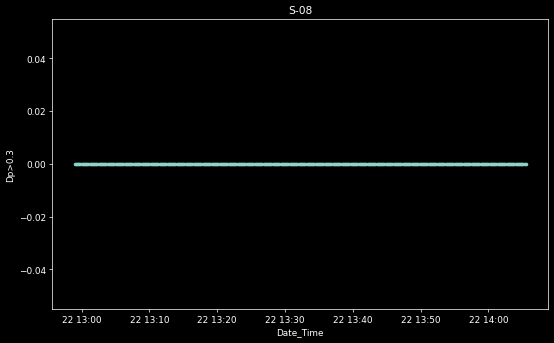

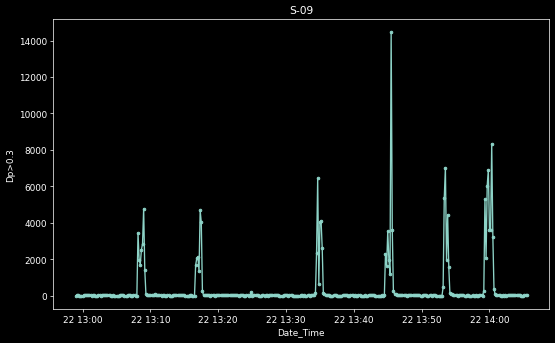

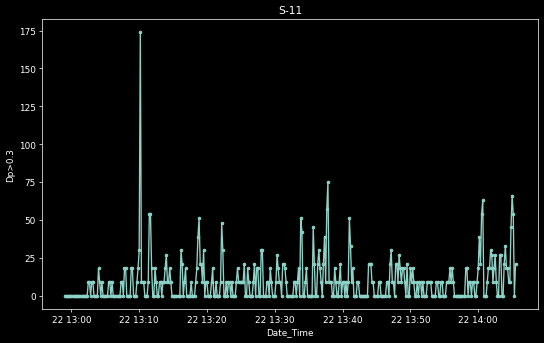

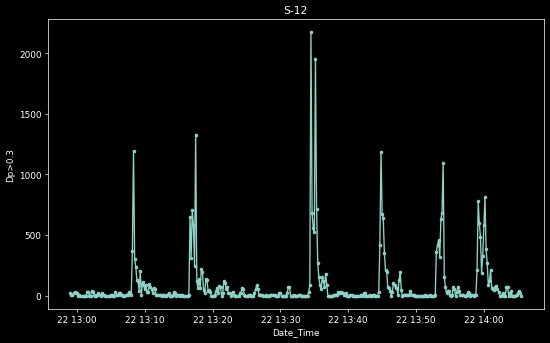

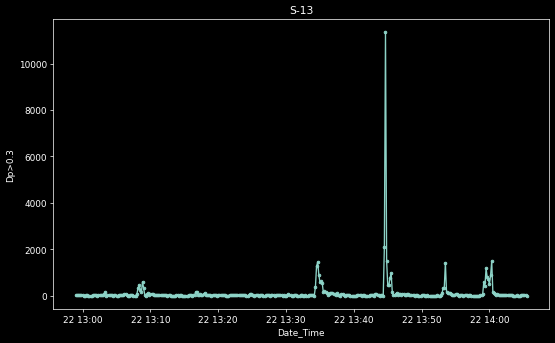

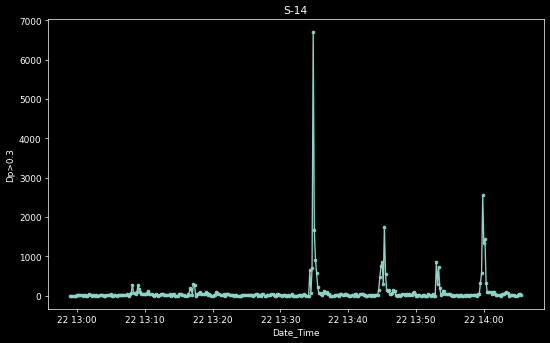

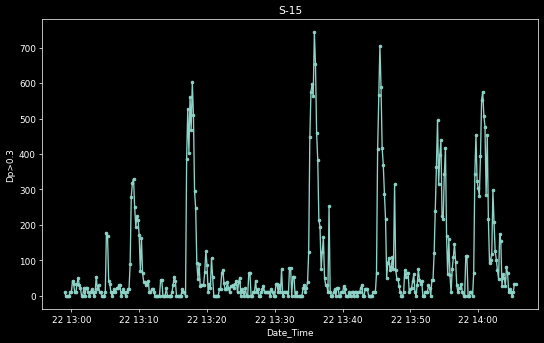

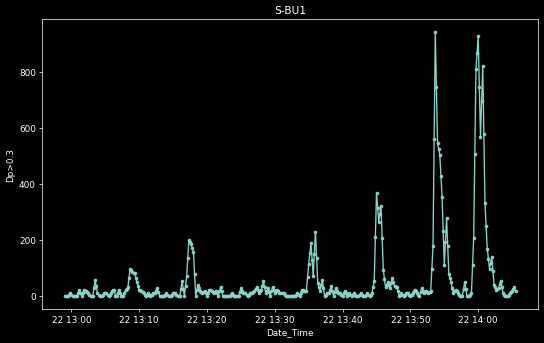

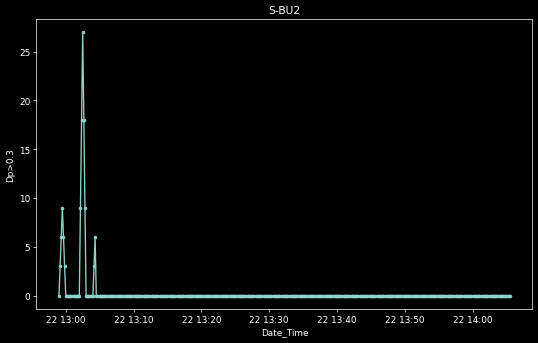

In [18]:
for idx,x in enumerate(df):
    fig = plt.figure(idx, figsize=(10,6), dpi=64)
    ax = fig.gca()
    ax.plot(df[x].iloc[:,0][:400],df[x].iloc[:,1][:400],'.-')
    ax.set_xlabel(df[x].columns[0])
    ax.set_ylabel(df[x].columns[1])
    plt.title(x)
